<a href="https://colab.research.google.com/github/AndresChavez123/SenalesySistemas/blob/main/DominioFrecuencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalacion de librerias **


In [1]:
!pip install numpy scipy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz


**Generación de la señal**

- Este bloque de codigo crea una señal sinusoidal de frecuencia
𝑓
=
50

𝐻
𝑧
 muestreada a
𝑓
𝑠
=
1000

𝐻
𝑧
 durante
𝑇
=
1

.
Esta señal es la entrada base para analizar en dominio del tiempo y frecuencia.

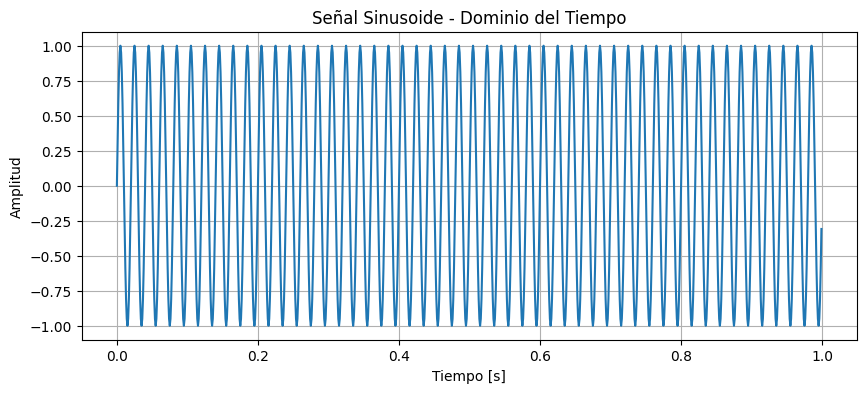

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo [Hz]
T = 1      # Duración [s]
f = 50     # Frecuencia de la sinusoide [Hz]

t = np.linspace(0, T, int(fs*T), endpoint=False)
x = np.sin(2 * np.pi * f * t)

# Graficar señal en el tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title("Señal Sinusoide - Dominio del Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


Este bloque calcula la Transformada Rápida de Fourier (FFT) para obtener el espectro de la señal y lo grafica. Permite ver en qué frecuencias se concentra la energía de la señal y verificar su contenido espectral.

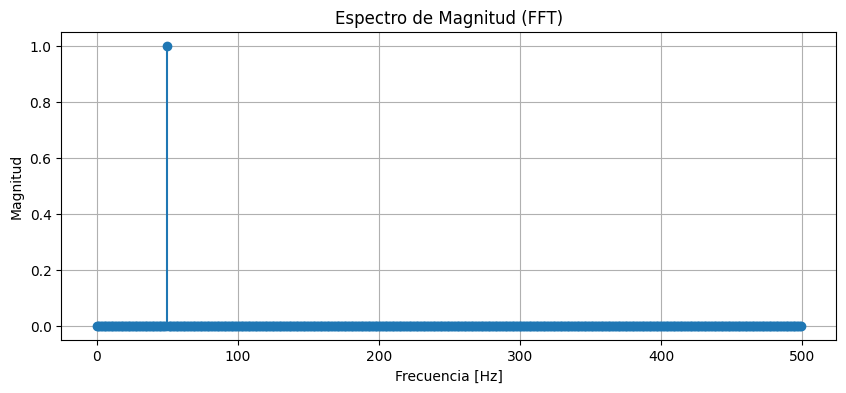

In [4]:
from scipy.fft import fft, fftfreq

N = len(x)
X_f = fft(x)
X_mag = 2.0/N * np.abs(X_f[:N//2])
frequencies = fftfreq(N, 1/fs)[:N//2]

plt.figure(figsize=(10, 4))
plt.stem(frequencies, X_mag, basefmt=" ")
plt.title("Espectro de Magnitud (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()


Este bloque aplica un filtro digital pasa-bajo Butterworth para eliminar las frecuencias altas de la señal original y mostrar cómo se atenúan, comparando la señal original y la filtrada.

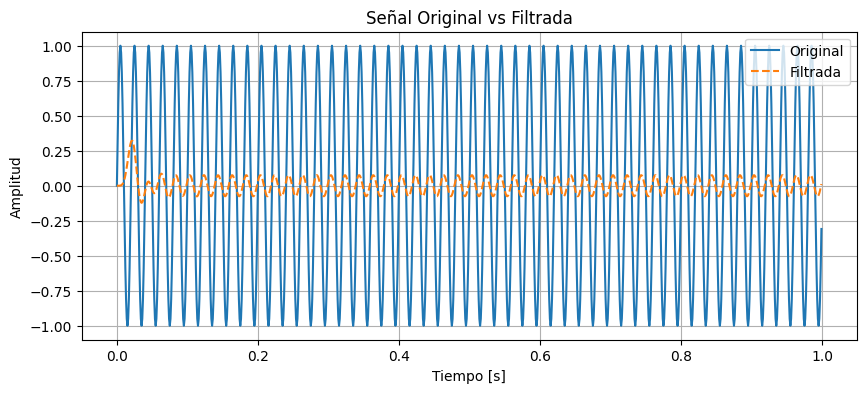

In [5]:
from scipy.signal import butter, lfilter

# Filtro Butterworth pasa-bajo
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parámetros del filtro
cutoff = 30  # Hz
order = 5

# Filtrar la señal
y = butter_lowpass_filter(x, cutoff, fs, order)

# Graficar señal filtrada
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Original')
plt.plot(t, y, label='Filtrada', linestyle='--')
plt.title("Señal Original vs Filtrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()
